Making a sample neural network on TensorFlow.

In [1]:
import tensorflow as tf

First, multi-layer perceptron.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
print(y_train[0:5])

[5 0 4 1 9]


In [5]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

2023-07-28 18:58:28.568243: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-07-28 18:58:28.568332: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-28 18:58:28.568344: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-28 18:58:28.568851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-28 18:58:28.569182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
print(y_train[0:5])

tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices ((x_test, y_test)).batch(50)

In [10]:
from tensorflow.keras.layers import Flatten
flat = Flatten(dtype='float32')

print(x_train.shape)
print(flat(x_train).shape)

(60000, 28, 28)
(60000, 784)


In [11]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

In [12]:
def forward(x):
    return tf.matmul(x,W) + b

In [17]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [24]:
def model(x):
    x = flat(x)
    return activate(x)

In [25]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [31]:
def train (x,y):
    with tf.GradientTape() as tape:
        loss = cross_entropy(y, model(x))
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W,b]))
    return loss.numpy()

In [32]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate = 0.25)

In [33]:
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 

epoch  0 batch 500 loss: 402.5702
epoch  0 batch 1000 loss: 344.53265
end of epoch  0 loss 461481.75 accuracy 0.65206665
epoch  1 batch 500 loss: 365.1266
epoch  1 batch 1000 loss: 325.00385
end of epoch  1 loss 458748.8 accuracy 0.6559333
epoch  2 batch 500 loss: 346.27234
epoch  2 batch 1000 loss: 336.95895
end of epoch  2 loss 453419.28 accuracy 0.66103333
epoch  3 batch 500 loss: 368.41364
epoch  3 batch 1000 loss: 332.78177
end of epoch  3 loss 459142.0 accuracy 0.656
epoch  4 batch 500 loss: 351.72223
epoch  4 batch 1000 loss: 299.56375
end of epoch  4 loss 452614.3 accuracy 0.6631
epoch  5 batch 500 loss: 345.4187
epoch  5 batch 1000 loss: 311.43112
end of epoch  5 loss 450865.2 accuracy 0.66518337
epoch  6 batch 500 loss: 357.24945
epoch  6 batch 1000 loss: 330.8289
end of epoch  6 loss 450264.88 accuracy 0.6663333
epoch  7 batch 500 loss: 345.39035
epoch  7 batch 1000 loss: 309.9415
end of epoch  7 loss 452757.4 accuracy 0.66436666
epoch  8 batch 500 loss: 345.39423
epoch  8 b

In [34]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.66443336
test accuracy 0.6629


Text(0, 0.5, 'loss')

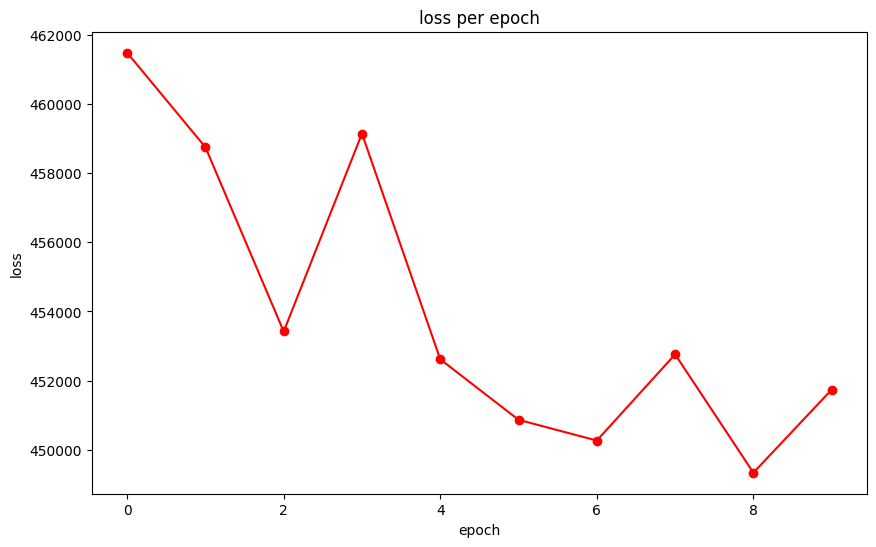

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

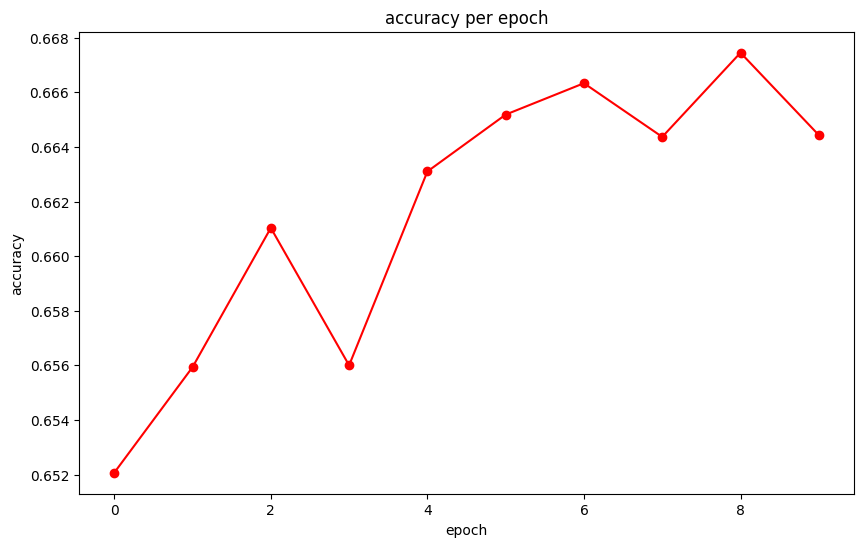

In [36]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")